## Import Data

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from statsmodels.stats.proportion import proportions_ztest
import itertools

matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")
#df_temp9 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/EvanMiya.csv")

# removing columns that are not needed
df_all = df_all.drop(columns=['TEAM', 'BID TYPE'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM ID"])
#df_temp9 = df_temp9.drop(columns=['YEAR', 'SEED', 'TEAM', 'ROUND'])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()
#df_temp9['TEAM NO'] = df_temp9['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')
#df_temp9 = df_temp9.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')
#df_temp9 = df_temp9.set_index('TEAM NO')

# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik_{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]
#df_temp9.columns = [f"EvanMiya_{col}" for col in df_temp9.columns]

list_csvs = [df_temp, df_temp2, df_temp3, df_temp4, df_temp5, df_temp6, df_temp7, df_temp8]


# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
#df_all = df_all.join(df_temp9, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)
df_all = df_all.drop(columns=['YEAR'])

df_all.rename(columns={'Barttorvik_Neutral_TEAM': 'TEAM'}, inplace=True)
print(df_all.shape)
print(df_all.head())


(924, 410)
  TEAM NO  SEED  ROUND  NET RPI  RESUME  WAB RANK  ELO  B POWER  Q1 W  Q2 W  \
0    1000    12     64       54      83        63   24     58.7     1     3   
1    1001     6      8       17      40        29   33     11.7     3     6   
2    1002     4      1        8      19        13   15      5.3     6     6   
3    1003    12     64       51     110        32   18     69.3     0     2   
4    1004    15     64      101     165       103   74    106.3     0     1   

   ...  Barttorvik_Neutral_BADJT RANK  Barttorvik_Neutral_AVG HGT RANK  \
0  ...                          284.0                            282.0   
1  ...                           69.0                             61.0   
2  ...                          277.0                             28.0   
3  ...                           45.0                            197.0   
4  ...                          140.0                            117.0   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0 

In [396]:
# Write column names to a text file, one per line
with open("columns.txt", "w") as f:
    for col in df_all.columns:
        f.write(col + "\n")

In [397]:
features = ['ShootingSplits_DUNKS FG%', 'ShootingSplits_CLOSE TWOS FG%', 'ShootingSplits_THREES FG%', 'Q1 W']

# Create a results dictionary
results = {}

for feature in features:
    mean_val = df_all[feature].mean()
    median_val = df_all[feature].median()
    mode_val = df_all[feature].mode().tolist()  # In case of multiple modes
    results[feature] = {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val
    }

# Convert results to a DataFrame for better readability (optional)
summary_df = pd.DataFrame(results).T  # Transpose so features are rows

print(summary_df)

                                    mean median          mode
ShootingSplits_DUNKS FG%       89.605952   90.1        [89.1]
ShootingSplits_CLOSE TWOS FG%  62.498701   62.5        [62.8]
ShootingSplits_THREES FG%      35.554762   35.5  [34.9, 36.5]
Q1 W                            3.983766    4.0           [0]


## Hypothesis Testing

In [398]:
def correlate_with_win_pct(df, team_col, win_pct_col, drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    df = df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if df[win_pct_col].dtype == 'object':
        df[win_pct_col] = (
            df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            valid = df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df

In [399]:
pearsons_results = correlate_with_win_pct(df_all, team_col="TEAM NO", win_pct_col='KenPom_Barttorvik_WIN%')
pearsons_results.to_csv('person_results.csv', index=False)
pearsons_results = pearsons_results.sort_values(by='p-value')
pearsons_results.head(20)

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
11,PLUS 500,0.982372,0.000000e+00,True
177,Barttorvik_Away_WIN%,0.805842,4.810376e-212,True
176,Barttorvik_Away_L,-0.799827,1.335527e-206,True
5,ELO,-0.734922,1.087078e-157,True
256,Barttorvik_Home_WIN%,0.706887,8.303568e-141,True
132,KenPom_Barttorvik_WAB,0.686095,1.581284e-129,True
255,Barttorvik_Home_L,-0.670367,1.321054e-121,True
211,Barttorvik_Away_WAB,0.650440,3.037242e-112,True
4,WAB RANK,-0.634550,2.861325e-105,True
175,Barttorvik_Away_W,0.616438,8.366582e-98,True


In [400]:
# plt.scatter(df_all['ShootingSplits_THREES FG%'], df_all['KenPom_Barttorvik_WIN%'])
# plt.xlabel('Threes FG % Rank')
# plt.ylabel('WIN %')
# plt.title('Threes FG % Rank vs Win %')
# plt.show()

In [401]:
pearsons_results = pearsons_results[pearsons_results['significant_relationship'] == True]
len(pearsons_results)

259

**Kruskal-Wallis Comparing Each Feature to Tournament Round Rached**

In [402]:
team_rankings_df = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings.csv")

round_reached_all_time = team_rankings_df[['TEAM NO', 'ROUND']]

round_reached_dict = dict(zip(round_reached_all_time['TEAM NO'], round_reached_all_time['ROUND']))

def create_stat_vs_round_vector(df, feature_name):
    stat_vector = []
    round_vector = []
    stat_dict = dict(zip(df['TEAM NO'], df[feature_name]))
    
    for team_no in round_reached_dict:
        if team_no > 131 and team_no <= 1000:
            team_no = str(team_no)
            if team_no in stat_dict:
                stat_vector.append(stat_dict[team_no])
                
                team_no = int(team_no)
                round_vector.append(round_reached_dict[team_no])
            
    return stat_vector, round_vector

In [403]:
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

list_KW_values = []
list_p_values = []
valid_columns = []

def perform_kruskal_wallis(df):
    features = df.columns

    for feature_name in features:
        
        samples_by_group = []

        stat_vector, round_vector = create_stat_vs_round_vector(df, feature_name)

        stat_vector = np.array(stat_vector)
        round_vector = np.array(round_vector)
        
        # Combines data for champion, finalist, and final four teams 
        replace_dict = {1 : 4, 2 : 4}
        rounds = np.array([replace_dict.get(x, x) for x in round_vector])
        
        for value in np.unique(rounds):
            mask = rounds == value
            data = stat_vector[mask]
            if len(np.unique(data)) > 1:
                samples_by_group.append(data)
        
        
        if len(samples_by_group) >= 2:
            stat, p = kruskal(*samples_by_group)
            list_KW_values.append(stat)
            list_p_values.append(p)
            valid_columns.append(feature_name)
        

        # sns.violinplot(x = rounds, y = stat_vector)

        # plt.title(f'{feature_name} vs Round')
        # plt.xlabel('Round Reached')
        # plt.ylabel(feature_name)
        # plt.show()

    df2 = pd.DataFrame({
        'variable_name': valid_columns,
        'test_statistic (K.W.)': list_KW_values,
        'p-value': list_p_values
    })
    alpha = 0.05
    num_hypothesis_tests = len(valid_columns)

    # Bonferroni Correction
    df2['significant_relationship'] = df2['p-value'] < (alpha / num_hypothesis_tests)

    return df2

In [404]:
KW_results = perform_kruskal_wallis(df_all)
KW_significant_results = KW_results[KW_results['significant_relationship'] == True]
KW_significant_results = KW_significant_results.sort_values(by = 'p-value')
print(f'Number of Significant Features: {len(KW_significant_results)}')
print(KW_significant_results.head(20))

Number of Significant Features: 190
                      variable_name  test_statistic (K.W.)       p-value  \
133           KenPom_Barttorvik_WAB             310.904995  4.526707e-65   
4                          WAB RANK             310.806685  4.752536e-65   
1                              SEED             305.947454  5.271024e-64   
12                          R SCORE             301.758481  4.193695e-63   
95        KenPom_Barttorvik_BARTHAG             300.492257  7.849334e-63   
92        KenPom_Barttorvik_BADJ EM             299.357840  1.376324e-62   
90        KenPom_Barttorvik_KADJ EM             297.304344  3.803449e-62   
137  KenPom_Barttorvik_BARTHAG RANK             296.834404  4.799545e-62   
6                           B POWER             296.243742  6.429422e-62   
134  KenPom_Barttorvik_BADJ EM RANK             295.221598  1.066329e-61   
91   KenPom_Barttorvik_KADJ EM RANK             293.447021  2.566462e-61   
2                           NET RPI             280.

In [405]:
# sns.violinplot(x = df_all['ROUND'], y = df_all['ShootingSplits_THREES FG%'])

# plt.title('Threes FG % vs Round')
# plt.xlabel('Round Reached')
# plt.ylabel('Threes FG %')
# plt.show()

In [406]:
significant_features = KW_significant_results['variable_name'].tolist()
significant_features_df = df_all[significant_features]
significant_features_df.head()

,KenPom_Barttorvik_WAB,WAB RANK,SEED,R SCORE,KenPom_Barttorvik_BARTHAG,KenPom_Barttorvik_BADJ EM,KenPom_Barttorvik_KADJ EM,KenPom_Barttorvik_BARTHAG RANK,B POWER,KenPom_Barttorvik_BADJ EM RANK,...,Barttorvik_Home_EFG%,Barttorvik_Neutral_PPPO,Barttorvik_Away_TOV% RANK,Barttorvik_Away_TOV%,ShootingSplits_DUNKS D SHARE RANK,KenPom_Barttorvik_FTRD,Barttorvik_Neutral_PPPO RANK,ShootingSplits_THREES FG%D,Barttorvik_Home_FTR RANK,ShootingSplits_FARTHER TWOS FG%D RANK
0,-0.7,63,12,3.9,0.791,11.8,12.50860,67,58.7,68,...,53.7,1.083,21,15.3,8.0,26.7,71.0,31.3,302,250.0
1,1.9,29,6,97.9,0.913,21.0,20.65450,14,11.7,15,...,57.4,1.072,136,18.0,67.0,19.8,83.0,33.6,320,88.0
2,4.9,13,4,99.6,0.947,26.4,25.36860,5,5.3,3,...,55.7,1.147,255,19.8,86.0,38.7,19.0,29.7,86,27.0
3,1.7,32,12,9.5,0.782,11.5,11.76070,74,69.3,70,...,52.6,1.037,105,17.5,16.0,24.7,141.0,30.1,158,179.0
4,-3.6,103,15,0.0,0.651,5.9,5.29267,113,106.3,108,...,59.1,1.171,82,17.1,38.0,20.3,9.0,35.6,210,321.0


In [407]:
# 1) Compute the full correlation matrix in pandas
corr_matrix = significant_features_df.corr(method='pearson')

threshold = 0.9
high_corr_pairs = []
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r = corr_matrix.iloc[i, j]
        if abs(r) >= threshold:
            high_corr_pairs.append((cols[i], cols[j], r))

print('Number of Highly Correlated pairs:', len(high_corr_pairs))

to_drop = set()

# print("Highly correlated feature pairs (|r| ≥ 0.9):")
for f1, f2, r in high_corr_pairs:
    to_drop.add(f2)
    # print(f"  {f1} ↔ {f2}: r = {r:.3f}")

# 3) If you want the exact p‑value for a given pair you can use scipy.stats.pearsonr
#    (e.g. for the first high‑corr pair)

reduced_df = significant_features_df.drop(columns = to_drop)

print('Number of features dropped:', len(to_drop))

if high_corr_pairs:
    f1, f2, r = high_corr_pairs[0]
    r_val, p_val = pearsonr(significant_features_df[f1], significant_features_df[f2])
    print(f"\nFor {f1} vs {f2}: Pearson r = {r_val:.3f}, p‑value = {p_val:.3g}")

print('Number of features remaining after dropping redundant features:', len(reduced_df.columns))

Number of Highly Correlated pairs: 348
Number of features dropped: 104

For KenPom_Barttorvik_WAB vs WAB RANK: Pearson r = -0.935, p‑value = 0
Number of features remaining after dropping redundant features: 86


In [408]:
# Add visualization here

## Standardize

In [409]:
df_all = df_all.drop(columns=['TEAM', 'ROUND'])

scaler = StandardScaler()
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head()) 

(924, 408)
       SEED   NET RPI    RESUME  WAB RANK       ELO   B POWER      Q1 W  \
0  0.725899  0.042834  0.270851  0.254861 -0.515215  0.037936 -0.898458   
1 -0.568948 -0.650537 -0.364530 -0.412810 -0.307056 -0.760649 -0.296227   
2 -1.000563 -0.819194 -0.674832 -0.727008 -0.723373 -0.869392  0.607119   
3  0.725899 -0.013386  0.669810 -0.353898 -0.653987  0.218042 -1.199573   
4  1.373322  0.923601  1.482506  1.040355  0.641221  0.846715 -1.199573   

       Q2 W  Q1 PLUS Q2 W   Q3 Q4 L  ...  Barttorvik_Neutral_AVG HGT RANK  \
0 -0.413617     -0.806597  0.184136  ...                         1.842514   
1  0.697377      0.176902 -0.487033  ...                        -0.655735   
2  0.697377      0.767001 -0.487033  ...                        -1.028776   
3 -0.783948     -1.199996 -0.151449  ...                         0.881649   
4 -1.154280     -1.396696  1.526473  ...                        -0.022694   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0       

**Standardize the reduced data frame created using correlation-based feature selection**

In [410]:
scaler = StandardScaler()
cols_to_scale = [col for col in reduced_df.columns if col != 'TEAM NO']
reduced_df_scaled = pd.DataFrame(
    scaler.fit_transform(reduced_df[cols_to_scale]),
    columns=cols_to_scale
)
reduced_df_scaled['TEAM NO'] = df_all['TEAM NO']
print(reduced_df_scaled.shape)
print(reduced_df_scaled.head())

(924, 87)
   KenPom_Barttorvik_WAB   R SCORE  Q1 PLUS Q2 W      Q1 W  \
0              -0.471766 -1.370353     -0.806597 -0.898458   
1               0.079691  0.847429      0.176902 -0.296227   
2               0.715987  0.887538      0.767001  0.607119   
3               0.037271 -1.238230     -1.199996 -1.199573   
4              -1.086852 -1.462367     -1.396696 -1.199573   

   Barttorvik_Home_WAB  KenPom_Barttorvik_BADJ O RANK  \
0            -0.204420                       0.401551   
1             0.507621                      -0.656225   
2             0.507621                      -0.902556   
3             0.049880                       0.010319   
4            -1.018180                      -0.409894   

   Barttorvik_Neutral_BADJ EM RANK  Barttorvik_Neutral_TALENT RANK  \
0                        -0.499829                        0.983066   
1                        -0.384843                       -0.891561   
2                        -1.113088                       -0.8194

## Data Processing

**Creating a List of Previous Matchups to Use as Training/Testing Data**

In [411]:
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)
print(len(matchups))

881


**Creating Difference Vectors for Each Matchup by subtracting Each Team's Stats from that Year**

In [412]:
pred_winners = []
true_winners = []
difference_vectors = []

skipped = 0  # Track how many matchups we skip
count = 0
for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO]
    team_0_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO]
    count += 1
    # Check if both teams exist in df_all_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors.append(difference_vector)
    else:
        skipped += 1

print("Count", count)
print(f'Number of Matchups: {len(difference_vector)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

Count 881
Number of Matchups: 407
✅ Finished creating vectors. Skipped 26 matchups due to missing teams.


## Baseline

In [ ]:
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.699205448354143


In [ ]:
# Read the data
matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
 
# Remove rows for 2008 and 2009
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]
 
# Define years of interest
years = list(range(2010, 2020)) + list(range(2021, 2025))
 
# Dictionary to store dataframes by year
dfs_by_year = {}
for year in years:
    dfs_by_year[year] = matchup_df[matchup_df['YEAR'] == year]
 
# Initialize list to store accuracies for each year
accuracies_by_year = []
 
# Loop through each year's DataFrame
for year in years:
    # Get the matchups for the year
    matchups = []
    for index, row in dfs_by_year[year].iterrows():
        if index % 2 == 0:
            team_1_no = row["TEAM NO"]
            team_1_score = row["SCORE"]
            team_1_seed = row["SEED"]
        else:
            team_0_no = row["TEAM NO"]
            team_0_score = row["SCORE"]
            team_0_seed = row["SEED"]
 
            winner = 1 if team_1_score > team_0_score else 0
 
            if team_1_seed == team_0_seed:
                lower_seed_won = random.randint(0, 1)
            else:
                team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
                lower_seed_won = 1 if winner == team_1_seed_is_lower else 0
 
            matchup = (team_1_no, team_0_no, winner, lower_seed_won)
            matchups.append(matchup)
 
    # Calculate the accuracy for the base model for this year
    total_lower_seeds_won = 0
    for matchup in matchups:
        total_lower_seeds_won += matchup[3]  # lower_seed_won
 
    accuracy = total_lower_seeds_won / len(matchups)
    accuracies_by_year.append((year, accuracy))
 
# Print the accuracies by year
for year, accuracy in accuracies_by_year:
    print(f'Accuracy of Base Model for {year}: {accuracy:}')
# Create a list of just the accuracies
baseline_accuracies = [accuracy for _, accuracy in accuracies_by_year]
 
model_results_df = pd.DataFrame({
    'Model': ['Baseline'],
    'Accuracy': baseline_accuracies
})

# Print the list of accuracies
print(baseline_accuracies)

Accuracy of Base Model for 2010: 0.6825396825396826
Accuracy of Base Model for 2011: 0.6825396825396826
Accuracy of Base Model for 2012: 0.7301587301587301
Accuracy of Base Model for 2013: 0.6666666666666666
Accuracy of Base Model for 2014: 0.6507936507936508
Accuracy of Base Model for 2015: 0.7936507936507936
Accuracy of Base Model for 2016: 0.6666666666666666
Accuracy of Base Model for 2017: 0.7619047619047619
Accuracy of Base Model for 2018: 0.6666666666666666
Accuracy of Base Model for 2019: 0.6825396825396826
Accuracy of Base Model for 2021: 0.6935483870967742
Accuracy of Base Model for 2022: 0.6666666666666666
Accuracy of Base Model for 2023: 0.6984126984126984
Accuracy of Base Model for 2024: 0.6984126984126984
[0.6825396825396826, 0.6825396825396826, 0.7301587301587301, 0.6666666666666666, 0.6507936507936508, 0.7936507936507936, 0.6666666666666666, 0.7619047619047619, 0.6666666666666666, 0.6825396825396826, 0.6935483870967742, 0.6666666666666666, 0.6984126984126984, 0.698412698

## All Features Linear Regression

In [415]:
# Do logistic regression with all features
#X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

new_row = {'Model': ['Linear Regression All'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

Accuracy: 0.6653696498054474


c:\Users\stevensl\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Greedy Logistic Regression

In [416]:
# Ensure X is a DataFrame
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Greedy logistic regression
greedy_lr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr.fit(X_train[selected_features], y_train)


predicted_winners_glr = greedy_lr.predict(X_test[selected_features])

new_row = {'Model': ['Linear Regression Greedy'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr))

✅ Added: KenPom_Barttorvik_KADJ EM | New CV Accuracy: 0.6872
❌ Skipped: KenPom_Barttorvik_KADJ EM RANK | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_Barttorvik_BADJ EM | CV Accuracy would be: 0.6806
❌ Skipped: Barttorvik_Home_BADJ EM RANK | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_Barttorvik_BARTHAG RANK | CV Accuracy would be: 0.6805
❌ Skipped: Barttorvik_Home_BADJ EM | CV Accuracy would be: 0.6872
✅ Added: Barttorvik_Home_BARTHAG RANK | New CV Accuracy: 0.6889
❌ Skipped: TeamRankings_Home_TR RANK | CV Accuracy would be: 0.6822
❌ Skipped: KenPom_Barttorvik_BADJ EM RANK | CV Accuracy would be: 0.6805
❌ Skipped: SEED | CV Accuracy would be: 0.6822
❌ Skipped: TeamRankings_Home_TR RATING | CV Accuracy would be: 0.6804
❌ Skipped: TeamRankings_Home_LAST | CV Accuracy would be: 0.6838
❌ Skipped: WAB RANK | CV Accuracy would be: 0.6873
❌ Skipped: Barttorvik_Home_BARTHAG | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_Barttorvik_WAB | CV Accuracy would be: 0.6771
❌ Skipped: Barttorvi

In [417]:
selected_features

['KenPom_Barttorvik_KADJ EM',
 'Barttorvik_Home_BARTHAG RANK',
 'B POWER',
 'KenPom_Barttorvik_TALENT',
 'TeamRankings_Neutral_TR RANK',
 'Barttorvik_Neutral_ELITE SOS',
 'Barttorvik_Away_ELITE SOS',
 'TeamRankings_Neutral_LO',
 'KenPom_Barttorvik_2PT% RANK',
 'KenPom_Barttorvik_FTRD RANK',
 'KenPom_Barttorvik_EXP',
 'Barttorvik_Home_FT%',
 'Barttorvik_Neutral_BLKED%',
 'Barttorvik_Home_OP FT% RANK']

## DNN

In [418]:
def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=64, epochs=10):
    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer, add hidden layers before this
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=8,epochs=epochs,
                        verbose=1)
    
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history, model

In [419]:
history, test = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
history2, model_dnn = run_binary_mlp(X_train, y_train, X_test, y_test,400,3)

Epoch 1/50


c:\Users\stevensl\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6355 - loss: 0.6362 - val_accuracy: 0.6537 - val_loss: 0.6351
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7297 - loss: 0.5332 - val_accuracy: 0.6965 - val_loss: 0.6030
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.5510 - val_accuracy: 0.6809 - val_loss: 0.6494
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.4691 - val_accuracy: 0.6926 - val_loss: 0.6482
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7936 - loss: 0.4634 - val_accuracy: 0.6732 - val_loss: 0.6567
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.3743 - val_accuracy: 0.6148 - val_loss: 0.7481
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8437 - loss: 0.3871 - val_accuracy: 0.6770 - val_loss: 0.7154
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.3554 - val_accuracy: 0.6848 - val_loss: 0.7502
Epo

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 400)            │       163,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,205 (5.54 MB)

 Trainable params: 484,401 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 968,804 (3.70 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on train set: 100.00%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy on test set: 63.81%
[[ 45  45]
 [ 48 119]]
Epoch 1/3


c:\Users\stevensl\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5971 - loss: 0.6741 - val_accuracy: 0.7121 - val_loss: 0.5696
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 0.5441 - val_accuracy: 0.6887 - val_loss: 0.6074
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6885 - loss: 0.5923 - val_accuracy: 0.7082 - val_loss: 0.5742


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 400)            │       163,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,205 (5.54 MB)

 Trainable params: 484,401 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 968,804 (3.70 MB)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy on train set: 83.78%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on test set: 70.82%
[[ 54  36]
 [ 39 128]]


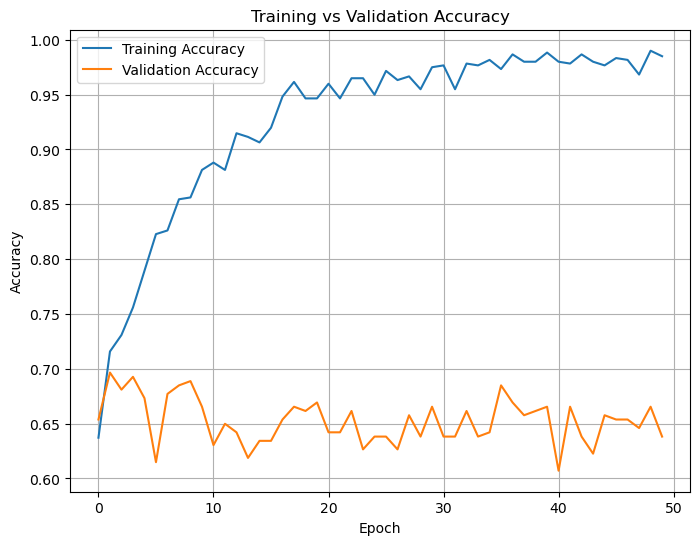

In [420]:
def plot_training_history(history):
    plt.figure(figsize=(8,6))
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

In [421]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
new_row = {'Model': ['DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("DNN")
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
DNN
Accuracy: 0.708171206225681


## Random Forest

In [422]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7159533073929961


## KNN

In [423]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6731517509727627


## Decision Tree Classifier

In [424]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))

Decision Tree
Accuracy: 0.6459143968871596


## SVM

In [425]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.708171206225681


## Gaussian NB

In [426]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.6536964980544747


## Confusion Matrices

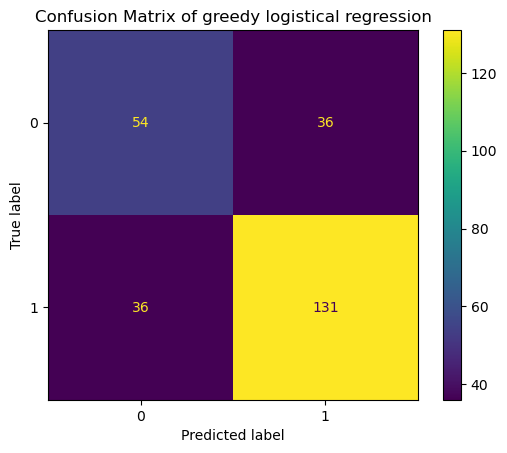

In [427]:
predicted_labels = greedy_lr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


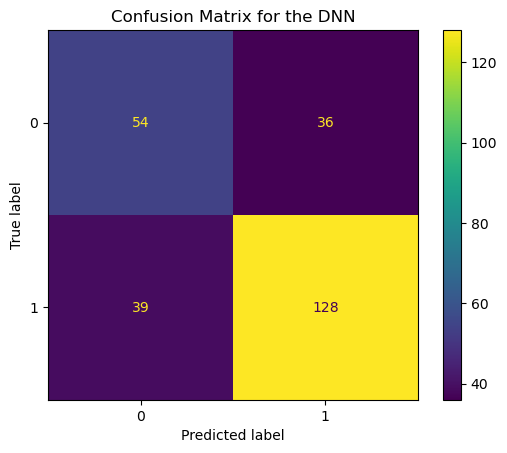

In [428]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN")
plt.show()

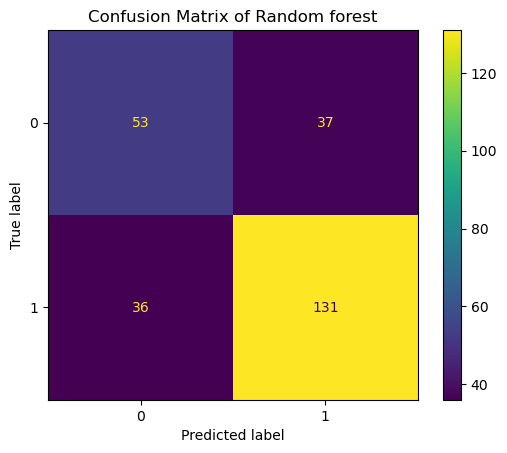

In [429]:
predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest")
plt.show()

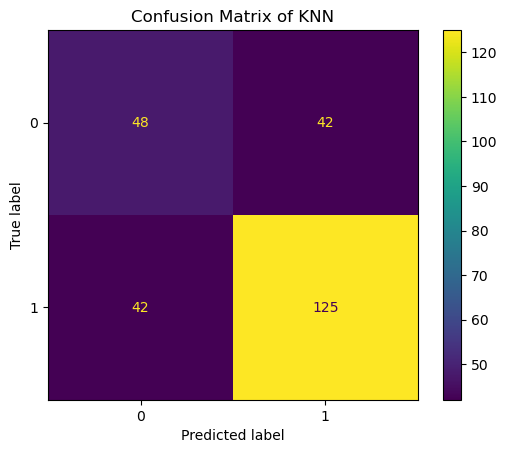

In [430]:
predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN")
plt.show()

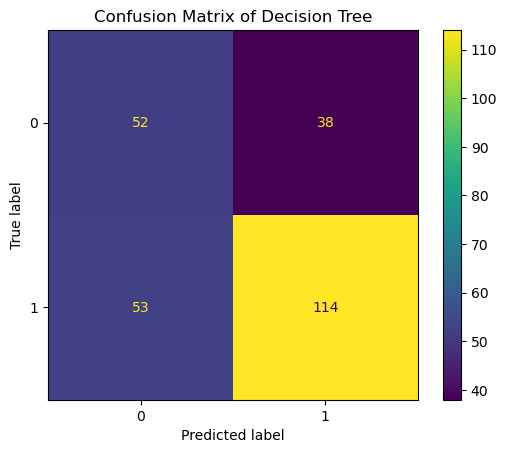

In [431]:
predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

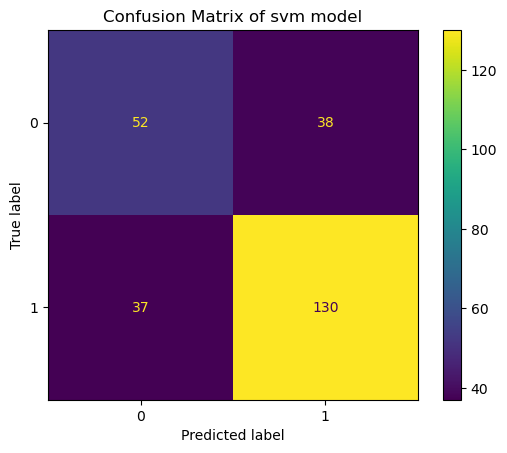

In [432]:
predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model")
plt.show()

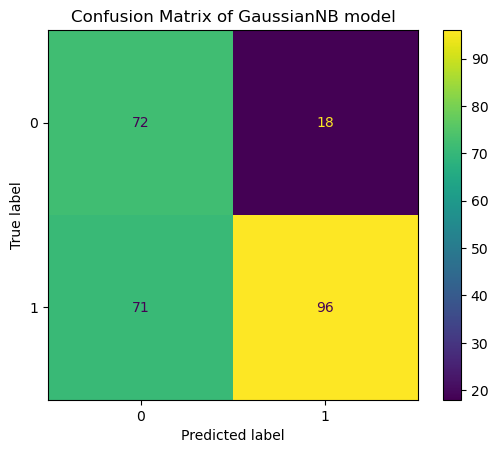

In [433]:
predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model")
plt.show()

## Dimensionality Reduction

In [434]:
df_reduced = df_all_scaled.copy()

df_reduced = df_reduced.drop(columns=['TEAM NO'])

svd = TruncatedSVD(n_components=10, random_state=42) 
X_svd = svd.fit_transform(df_reduced)
X_svd.shape

(924, 10)

**Take each CSV and smash them each into one feature using dimensionality reduction**

In [435]:
csv_reduced_features = []

for df in list_csvs:
    df_ints = df.select_dtypes(exclude=['object'])
    df_cleans = df_ints.dropna()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cleans)
    
    svd_csv = TruncatedSVD(n_components = 2, random_state = 42)
    X_reduced = svd_csv.fit_transform(X_scaled)

    print(svd_csv.explained_variance_ratio_.sum())

    csv_reduced_features.append(X_reduced.flatten())
    


0.30284171423385364
0.5016274635539982
0.5720713111437692
0.4907871162610653
0.3683332706064819
0.29911836864584695
0.33058436792016355
0.2492221027459417


In [436]:
df_10d = pd.DataFrame(X_svd)
df_10d["TEAM NO"] = df_all_scaled['TEAM NO']

In [437]:
pred_winners2 = []
true_winners2 = []
difference_vectors2 = []

skipped = 0  # Track skipped matchups

for matchup in matchups:
    team_1_NO = str(matchup[0])
    team_0_NO = str(matchup[1])

    # Look up rows in df_10d
    team_1_row = df_10d[df_10d["TEAM NO"] == team_1_NO]
    team_0_row = df_10d[df_10d["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners2.append(matchup[2])

        # Drop TEAM NO and convert to numpy arrays
        team_1_vector = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_vector = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Compute difference vector
        difference_vector = team_1_vector - team_0_vector
        difference_vectors2.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating reduced difference vectors. Skipped {skipped} matchups.")

# Convert to DataFrame
X = pd.DataFrame(difference_vectors2, columns=[f"SVD_{i+1}" for i in range(10)])
y = np.array(true_winners2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Finished creating reduced difference vectors. Skipped 1 matchups.


### Logistic Regression

In [438]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train, y_train)

predicted_winners = LR_model_dr.predict(X_test)
new_row = {'Model': ['Feature Reduced Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners))

Accuracy: 0.5789473684210527


### Greedy Logistic Regression

In [439]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr_dr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train[selected_features], y_train)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test[selected_features])
new_row = {'Model': ['Feature Reduced Greedy Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr_dr)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners_glr_dr))

✅ Added: SVD_1 | New CV Accuracy: 0.7700
❌ Skipped: SVD_3 | CV Accuracy would be: 0.7700
❌ Skipped: SVD_4 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_6 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_7 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_9 | CV Accuracy would be: 0.7450
❌ Skipped: SVD_10 | CV Accuracy would be: 0.7700
❌ Skipped: SVD_5 | CV Accuracy would be: 0.7200
❌ Skipped: SVD_2 | CV Accuracy would be: 0.7000
✅ Added: SVD_8 | New CV Accuracy: 0.7950
Accuracy: 0.631578947368421


### DNN

Epoch 1/50


c:\Users\stevensl\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5650 - loss: 0.6930 - val_accuracy: 0.7368 - val_loss: 0.5647
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7305 - loss: 0.5445 - val_accuracy: 0.6316 - val_loss: 0.6467
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6950 - loss: 0.5856 - val_accuracy: 0.5789 - val_loss: 0.6404
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8585 - loss: 0.4721 - val_accuracy: 0.5263 - val_loss: 0.6533
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6748 - loss: 0.5457 - val_accuracy: 0.5263 - val_loss: 0.6829
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8058 - loss: 0.3701 - val_accuracy: 0.4737 - val_loss: 0.7170
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8628 - loss: 0.4108 - val_accuracy: 0.5263 - val_loss: 0.7982
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8188 - loss: 0.3841 - val_accuracy: 0.5263 - val_loss: 0.8417
Epoch 9/50


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 400)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 976,805 (3.73 MB)

 Trainable params: 325,601 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 651,204 (2.48 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy on train set: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Accuracy on test set: 36.84%
[[1 7]
 [5 6]]


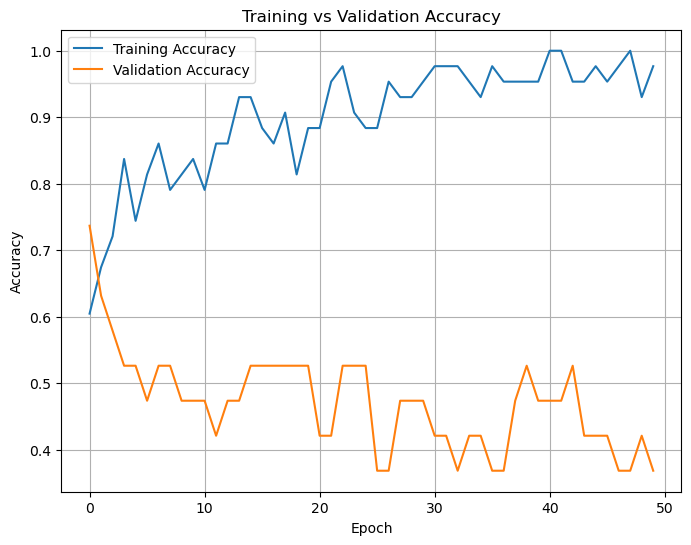

In [440]:
history_dr, model_dnn_dr = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
plot_training_history(history_dr)

In [441]:
predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")
new_row = {'Model': ['Feature Reduced DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
DNN
Accuracy: 0.3684210526315789


### Random Forest Classifer

In [442]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Feature Reduced Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.5263157894736842


### KNN

In [444]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['Feature Reduced KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.631578947368421


### Decision Tree Classifier

In [445]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Feature Reduced Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))


Decision Tree
Accuracy: 0.5789473684210527


### SVM

In [446]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['Feature Reduced SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.631578947368421


### Gaussian NB

In [447]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Feature Reduced Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.631578947368421


## Confusion Matricies

Accuracy: 0.5789473684210527


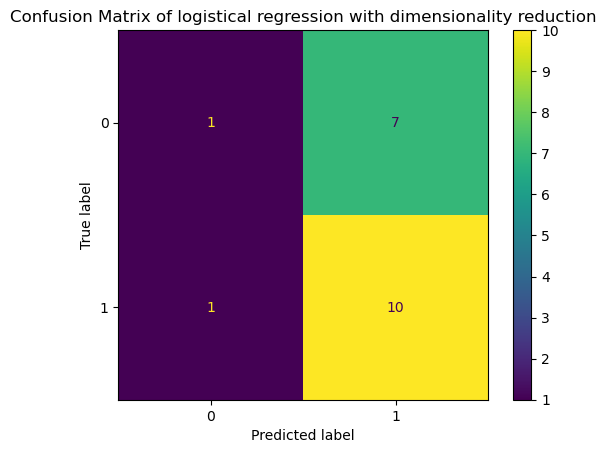

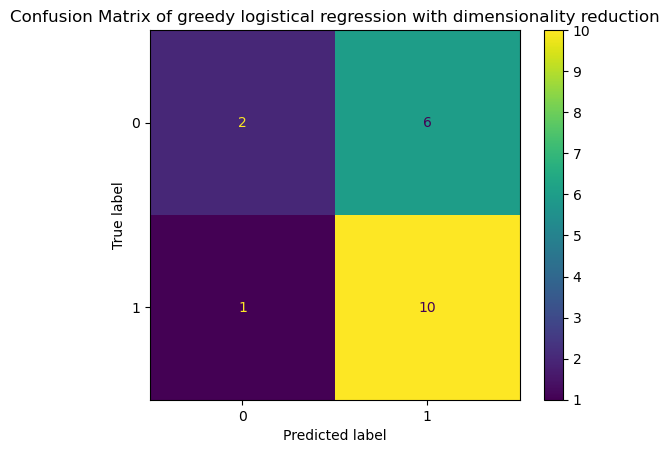

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


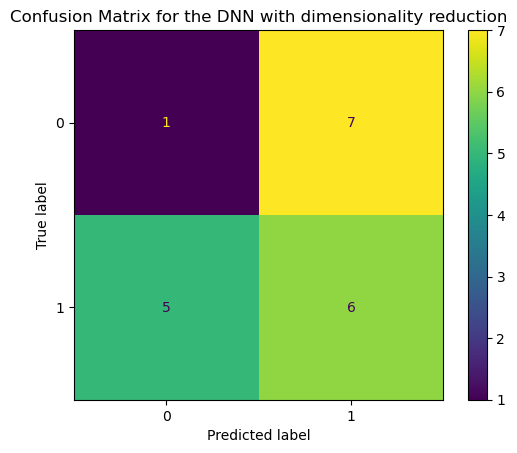

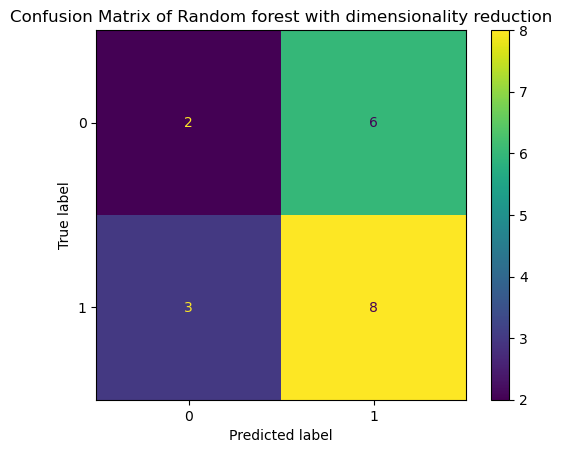

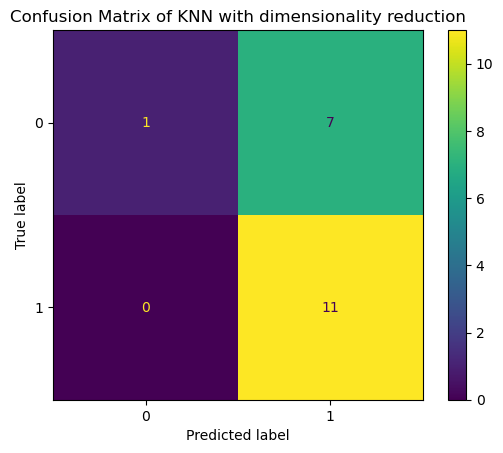

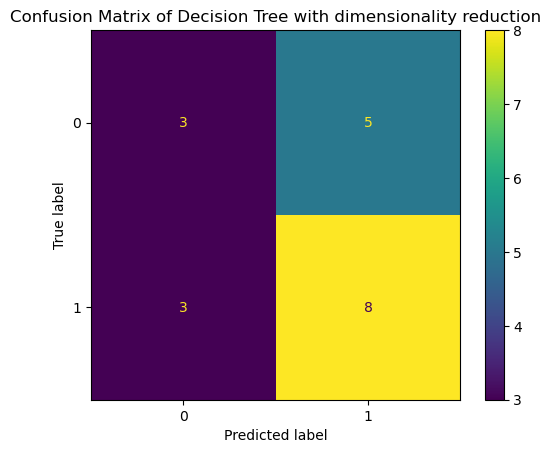

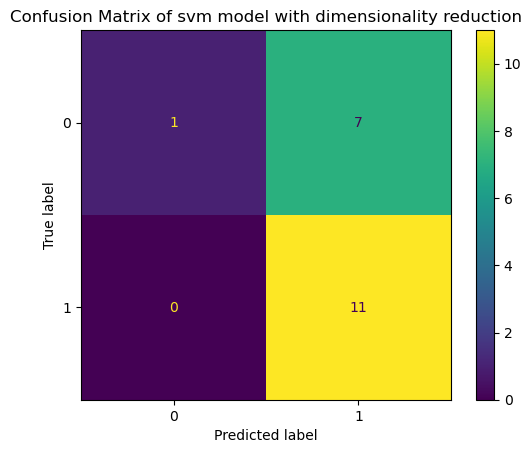

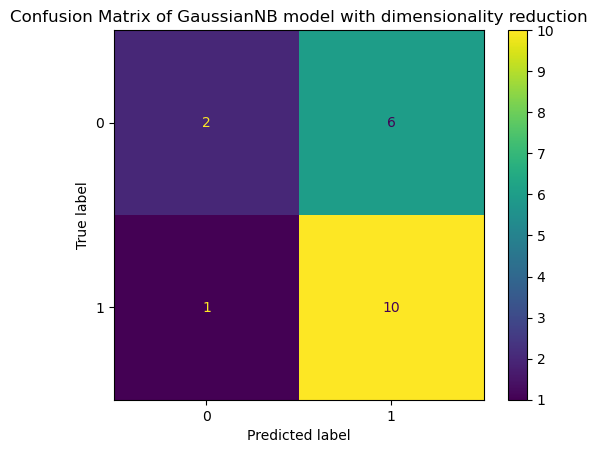

In [448]:
predicted_labels = LR_model_dr.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)

print("Accuracy:", accuracy_score(y_test, predicted_labels))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of logistical regression with dimensionality reduction")
plt.show()


predicted_labels = greedy_lr_dr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression with dimensionality reduction")
plt.show()

predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN with dimensionality reduction")
plt.show()

predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest with dimensionality reduction")
plt.show()

predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN with dimensionality reduction")
plt.show()

predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree with dimensionality reduction")
plt.show()

predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model with dimensionality reduction")
plt.show()

predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model with dimensionality reduction")
plt.show()

## Models Using Correlation Based Feature Selection

In [449]:
difference_vectors3 = []
true_winners3 = []

skipped = 0  # Track how many matchups we skip

for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_1_NO]
    team_0_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_0_NO]

    # Check if both teams exist in reduced_df_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners3.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors3.append(difference_vector)
    else:
        skipped += 1

print(f'Number of Matchups: {len(difference_vectors3)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

X3 = pd.DataFrame(difference_vectors3, columns=reduced_df_scaled.drop(columns=["TEAM NO"]).columns)
y3 = np.array(true_winners3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

Number of Matchups: 62
✅ Finished creating vectors. Skipped 1 matchups due to missing teams.


### Logistic Regression

In [450]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train3, y_train3)

predicted_winners3 = LR_model_dr.predict(X_test3)
new_row = {'Model': ['CFS Linear Regression'], 'Accuracy': accuracy_score(y_test3, predicted_winners3)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test3, predicted_winners3))

Accuracy: 0.5263157894736842


### Greedy Logistic Regression

In [451]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train3.columns:
    score = cross_val_score(greedy_lr_dr, X_train3[[feature]], y_train3, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train3[current_features], y_train3, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train3[selected_features], y_train3)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test3[selected_features])
new_row = {'Model': ['CFS Greedy Linear Regression'], 'Accuracy': accuracy_score(y_test3, predicted_winners_glr_dr)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test3, predicted_winners_glr_dr))

✅ Added: Q2 W | New CV Accuracy: 0.8000
❌ Skipped: TeamRankings_Home_LO | CV Accuracy would be: 0.7600
❌ Skipped: TeamRankings_Away_V 26-50 WINS | CV Accuracy would be: 0.7650
✅ Added: KenPom_Barttorvik_BADJ D RANK | New CV Accuracy: 0.8050
❌ Skipped: TeamRankings_Home_HI | CV Accuracy would be: 0.7850
❌ Skipped: TeamRankings_Home_V 51-100 WINS | CV Accuracy would be: 0.7550
❌ Skipped: Q1 W | CV Accuracy would be: 0.8050
❌ Skipped: Q1 PLUS Q2 W | CV Accuracy would be: 0.7550
❌ Skipped: TeamRankings_Away_V 51-100 WINS | CV Accuracy would be: 0.8050
❌ Skipped: TeamRankings_Away_LO | CV Accuracy would be: 0.7600
❌ Skipped: KenPom_Barttorvik_ELITE SOS | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Neutral_ELITE SOS RANK | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Home_BADJ D RANK | CV Accuracy would be: 0.7550
❌ Skipped: R SCORE | CV Accuracy would be: 0.7850
❌ Skipped: TeamRankings_Home_V 1-25 WINS | CV Accuracy would be: 0.8050
❌ Skipped: Barttorvik_Neutral_TALENT RANK | C

### DNN

Epoch 1/50


c:\Users\stevensl\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.6357 - loss: 0.6593 - val_accuracy: 0.5263 - val_loss: 0.6554
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6186 - loss: 0.6042 - val_accuracy: 0.5789 - val_loss: 0.6592
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6690 - loss: 0.5100 - val_accuracy: 0.6842 - val_loss: 0.6467
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7607 - loss: 0.5161 - val_accuracy: 0.6316 - val_loss: 0.6409
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8132 - loss: 0.4677 - val_accuracy: 0.6316 - val_loss: 0.6647
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7948 - loss: 0.4374 - val_accuracy: 0.6316 - val_loss: 0.6980
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8751 - loss: 0.3763 - val_accuracy: 0.6316 - val_loss: 0.7232
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8970 - loss: 0.3426 - val_accuracy: 0.6316 - val_loss: 0.7465
Epoch 9/50

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 400)            │        34,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,005 (4.07 MB)

 Trainable params: 356,001 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 712,004 (2.72 MB)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/stepWARNING:tensorflow:5 out of the last 35 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000241345AD8A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Accuracy on train set: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Accuracy on test set: 57.89%
[[3 5]
 [3 8]]


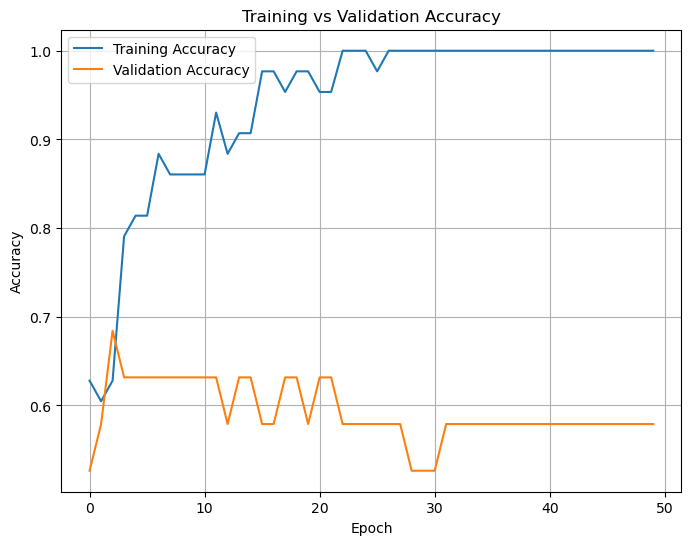

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
DNN
Accuracy: 0.5789473684210527


In [452]:
history_dr, model_dnn_dr = run_binary_mlp(X_train3, y_train3, X_test3, y_test3,400,50)
plot_training_history(history_dr)

predicted_probabilities = model_dnn_dr.predict(X_test3)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")
new_row = {'Model': ['CFS DNN'], 'Accuracy': accuracy_score(y_test3, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test3, predicted_probabilities))

### Random Forrest 

In [453]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train3, y_train3)

preds_rf = clf.predict(X_test3)
new_row = {'Model': ['CFS Random Forest'], 'Accuracy': accuracy_score(y_test3, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test3, preds_rf))

Random Forest
Accuracy: 0.631578947368421


### KNN

In [455]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train3, y_train3)

preds_knn = neigh.predict(X_test3)
new_row = {'Model': ['CFS KNN'], 'Accuracy': accuracy_score(y_test3, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test3, preds_knn))

KNN
Accuracy: 0.631578947368421


### Decision Tree Classifier

In [456]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train3, y_train3)

preds_dtc = dtc.predict(X_test3)
new_row = {'Model': ['CFS Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test3, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test3, preds_dtc))

Decision Tree
Accuracy: 0.7368421052631579


### SVM

In [457]:
svm_model = svm.SVC()
svm_model.fit(X_train3, y_train3)

preds_svm = svm_model.predict(X_test3)
new_row = {'Model': ['CFS SVM'], 'Accuracy': accuracy_score(y_test3, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test3, preds_svm))

svm
Accuracy: 0.5263157894736842


### Gaussian NB

In [458]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train3, y_train3).predict(X_test3)
new_row = {'Model': ['CFS Gaussian NB'], 'Accuracy': accuracy_score(y_test3, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test3, gnb_preds))

gaussianNB
Accuracy: 0.5789473684210527


In [459]:
model_results_df

,Model,Accuracy
0,Baseline,0.699205
1,[Linear Regression All],0.665370
2,[Linear Regression Greedy],0.719844
3,[DNN],0.708171
4,[Random Forest],0.715953
5,[KNN],0.673152
6,[Decision Tree Classifier],0.645914
7,[SVM],0.708171
8,[Gaussian NB],0.653696
9,[Feature Reduced Linear Regression],0.578947


In [460]:
N = len(X_test)

# Ensure 'Model' column contains only strings
model_results_df['Model'] = model_results_df['Model'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Build a dict: { model_name: count_correct }
counts = (
    model_results_df
    .set_index('Model')['Accuracy']
    .mul(N)
    .round()
    .astype(int)
    .to_dict()
)

# Compare only Baseline vs each other model
baseline_model = 'Baseline'
other_models = [m for m in counts.keys() if m != baseline_model]

results = []
for other in other_models:
    c1, c2 = counts[baseline_model], counts[other]
    stat, p = proportions_ztest([c1, c2], [N, N])
    results.append({
        'model_1': baseline_model,
        'model_2': other,
        'z_stat': stat,
        'p_raw': p
    })

res_df = pd.DataFrame(results)

# Bonferroni-corrected alpha
alpha = 0.05
m = len(res_df)
res_df['p_bonf'] = (res_df['p_raw'] * m).clip(upper=1.0)
res_df['significant'] = res_df['p_bonf'] < alpha

# Clean output
res_df['model_pair'] = res_df['model_1'] + " vs " + res_df['model_2']
summary_df = res_df[['model_pair', 'p_bonf', 'significant']].sort_values('p_bonf')

print(summary_df.to_string(index=False))

                                          model_pair  p_bonf  significant
                   Baseline vs Linear Regression All     1.0        False
            Baseline vs CFS Decision Tree Classifier     1.0        False
                                 Baseline vs CFS KNN     1.0        False
                       Baseline vs CFS Random Forest     1.0        False
                                 Baseline vs CFS DNN     1.0        False
            Baseline vs CFS Greedy Linear Regression     1.0        False
                   Baseline vs CFS Linear Regression     1.0        False
             Baseline vs Feature Reduced Gaussian NB     1.0        False
                     Baseline vs Feature Reduced SVM     1.0        False
Baseline vs Feature Reduced Decision Tree Classifier     1.0        False
                     Baseline vs Feature Reduced KNN     1.0        False
           Baseline vs Feature Reduced Random Forest     1.0        False
                     Baseline vs Featu